## Modeling

In [1]:
import yaml 
import numpy 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import DirectoryIterator, ImageDataGenerator
import os

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [4]:
def load_config():
    with open('D:\\ProgrammingD\\github\\abstract-painting\\src\\resources\\config.yml') as f:
        try:
            config = yaml.safe_load(f)
            print("Config Loaded Successfully")
            return config
        except Exception as e:
            print(e)
            return ""

In [5]:
config = load_config()

Config Loaded Successfully


In [6]:
def iterate_in_directory(directory=None, save_to_dir=None):
    
    if directory==None:
        print("loading directory from config...")
        print(config['RAW_IMG_DIR'])
        directory = config['RAW_IMG_DIR']
    if save_to_dir==None:
        print("preprocessed images will be saved to (per config)...")
        if config['PREPROCESSED_IMG_DIR']==None:
            print("Images will not be saved to a directory")
        else: print(config['PREPROCESSED_IMG_DIR'])
        save_to_dir = config['PREPROCESSED_IMG_DIR']
    
    idg = ImageDataGenerator(samplewise_center=True)

    """
    directory_iterator = DirectoryIterator(
        directory=directory,
        image_data_generator=idg,
        target_size=(config['IMAGE_PARAMS']['IMAGE_HEIGHT'],config['IMAGE_PARAMS']['IMAGE_WIDTH']),
        classes=None,
        seed=0,
        save_to_dir=save_to_dir
        )
    """
    # image generator to flow from directory
    idg = idg.flow_from_directory(
        directory=directory,
        target_size=(config['IMAGE_PARAMS']['IMAGE_HEIGHT'],config['IMAGE_PARAMS']['IMAGE_WIDTH']),
        batch_size=1
        )

    return idg

In [7]:
os.getcwd()

'd:\\ProgrammingD\\github\\abstract-painting\\notebooks\\model-example'

In [8]:
generator = iterate_in_directory(directory='D:\\ProgrammingD\\github\\abstract-painting\\data\\raw', save_to_dir=None)

preprocessed images will be saved to (per config)...
..\data\processed
Found 107 images belonging to 2 classes.


In [9]:
import glob
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler

In [10]:
img_dir = 'D:\\ProgrammingD\\github\\abstract-painting\\data\\raw\\img\\'
def preprocess_images(resize_height, resize_width, show=False):

    images = []
    counter = 0
    for f in glob.glob(f'{img_dir}*.jpg'):
        print(f"Image {counter}")
        img = cv2.imread(f)
        new_img = cv2.resize(img, (resize_height,resize_width))
        
        if show==True:
            plt.imshow(new_img)
            plt.show()

        #plt.imsave(f'./images_processed/train/{counter}.jpg', new_img)
        cv2.waitKey(0)

        #save as np array and add to array
        img_np = np.asarray(new_img) / 255.
        images.append(img_np)

        print(f"...complete")
        counter += 1
    images = np.array(images)
    return images

data = preprocess_images(480,720, show=False)

Image 0
...complete
Image 1
...complete
Image 2
...complete
Image 3
...complete
Image 4
...complete
Image 5
...complete
Image 6
...complete
Image 7
...complete
Image 8
...complete
Image 9
...complete
Image 10
...complete
Image 11
...complete
Image 12
...complete
Image 13
...complete
Image 14
...complete
Image 15
...complete
Image 16
...complete
Image 17
...complete
Image 18
...complete
Image 19
...complete
Image 20
...complete
Image 21
...complete
Image 22
...complete
Image 23
...complete
Image 24
...complete
Image 25
...complete
Image 26
...complete
Image 27
...complete
Image 28
...complete
Image 29
...complete
Image 30
...complete
Image 31
...complete
Image 32
...complete
Image 33
...complete
Image 34
...complete
Image 35
...complete
Image 36
...complete
Image 37
...complete
Image 38
...complete
Image 39
...complete
Image 40
...complete
Image 41
...complete
Image 42
...complete
Image 43
...complete
Image 44
...complete
Image 45
...complete
Image 46
...complete
Image 47
...complete
Im

In [11]:
data.shape

(90, 720, 480, 3)

In [12]:
data_32 = data.astype(np.float32)

In [13]:
data_32_flip = np.flip(data_32, axis=0)
data_32_flip.shape

(90, 720, 480, 3)

In [14]:
encoder = keras.Sequential(
    [
        #layers.Conv2D(64, kernel_size=3, activation='relu'),
        #layers.MaxPool2D(),
        layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D(),
        layers.Conv2D(24, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D()
    ]
)

decoder = keras.Sequential(
    [
        layers.Conv2DTranspose(5, kernel_size=3, strides = 2, activation='relu', padding='same'),
        layers.Conv2DTranspose(64, kernel_size=3, strides = 2, activation='relu', padding='same'),
        #layers.Conv2D(32, kernel_size=3, activation='relu'),
        #layers.UpSampling2D(),
        layers.Conv2D(10, kernel_size=3, activation='relu'),
        layers.Conv2D(3, kernel_size=3, activation='sigmoid')
    ]
)


model = keras.models.Sequential([
        #encoder
        #layers.Conv2D(64, kernel_size=3, activation='relu'),
        #layers.MaxPool2D(),
        layers.Conv2D(22,kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),
        layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),
        layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),
        # decoder
        layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(24, kernel_size=3, strides=2, activation='relu', padding='same'),
        #layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2D(15, kernel_size=3, activation='relu', padding='same'),
        layers.Conv2D(3, kernel_size=3, activation='relu', padding='same')
        #layers.Conv2D(32, kernel_size=3, activation='relu'),
        #layers.UpSampling2D(),
        #layers.Conv2D(10, kernel_size=3, activation='relu'),
        #layers.Conv2D(3, kernel_size=3, activation='sigmoid')
])

In [15]:
loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
model.compile(optimizer='adam', loss=loss, metrics=['mse'])

In [51]:
#model.build(input_shape=[1,720,480,3])
#model.summary()
# original setup
#history = model.fit(x=data_32, y=data_32, epochs=50, batch_size=16)
# reverese setup
history = model.fit(x=data_32, y=data_32_flip, epochs=100, batch_size=16)

Epoch 1/100
6/6 [==============================] - 2s 386ms/step - loss: 0.1637 - mse: 0.1637
Epoch 2/100
6/6 [==============================] - 2s 384ms/step - loss: 0.1196 - mse: 0.1196
Epoch 3/100
6/6 [==============================] - 2s 388ms/step - loss: 0.1053 - mse: 0.1053
Epoch 4/100
6/6 [==============================] - 2s 387ms/step - loss: 0.0990 - mse: 0.0990
Epoch 5/100
6/6 [==============================] - 2s 386ms/step - loss: 0.0945 - mse: 0.0945
Epoch 6/100
6/6 [==============================] - 2s 384ms/step - loss: 0.0934 - mse: 0.0934
Epoch 7/100
6/6 [==============================] - 2s 391ms/step - loss: 0.0916 - mse: 0.0916
Epoch 8/100
6/6 [==============================] - 2s 385ms/step - loss: 0.0923 - mse: 0.0923
Epoch 9/100
6/6 [==============================] - 2s 396ms/step - loss: 0.0889 - mse: 0.0889
Epoch 10/100
6/6 [==============================] - 2s 387ms/step - loss: 0.0906 - mse: 0.0906
Epoch 11/100
6/6 [==============================] - 2s 387m

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 720, 480, 22)      616       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 360, 240, 22)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 360, 240, 32)      6368      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 180, 120, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 120, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 60, 64)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 180, 120, 64)     

In [53]:
result = model.predict(data_32)

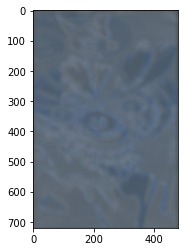

In [69]:
plt.imshow(result[3])

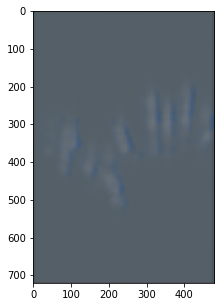

In [55]:
plt.figure(figsize=[5,5])
plt.imshow(model.predict(data_32[50:55]*0.5)[1,:,:,:])


In [56]:
img_dir = 'D:\\ProgrammingD\\github\\abstract-painting\\data\\raw\\nonabstract\\'

test_img_data = preprocess_images(480,720, show=False)

Image 0
...complete
Image 1
...complete
Image 2
...complete
Image 3
...complete
Image 4
...complete
Image 5
...complete
Image 6
...complete
Image 7
...complete
Image 8
...complete
Image 9
...complete
Image 10
...complete
Image 11
...complete
Image 12
...complete
Image 13
...complete
Image 14
...complete
Image 15
...complete
Image 16
...complete


In [57]:
test_img_result = model.predict(test_img_data)

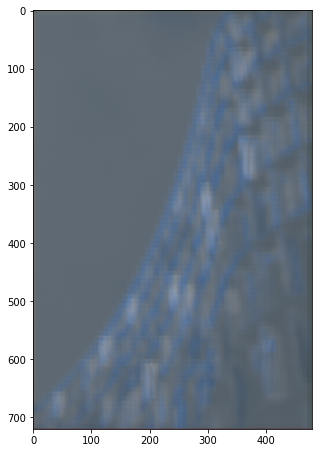

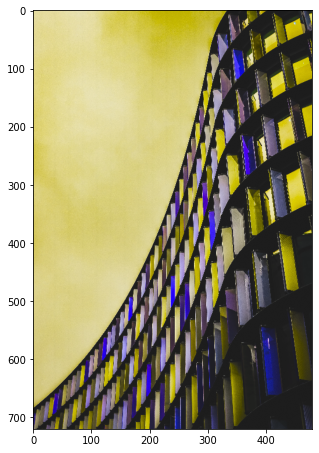

In [65]:
plt.figure(figsize=[5,10])
plt.imshow(test_img_result[10], cmap='jet')

plt.figure(figsize=[5,10])
plt.imshow(test_img_data[10])


## Reverse Model to Try and Figure out Original Picture After Being Trained on Random Images Not Matching Each Other

In [71]:
history_back_to_og = model.fit(x=result, y=data_32, epochs=300, batch_size=16)

Epoch 1/100
6/6 [==============================] - 2s 390ms/step - loss: 0.0923 - mse: 0.0923
Epoch 2/100
6/6 [==============================] - 2s 387ms/step - loss: 0.0982 - mse: 0.0982
Epoch 3/100
6/6 [==============================] - 2s 384ms/step - loss: 0.0922 - mse: 0.0922
Epoch 4/100
6/6 [==============================] - 2s 379ms/step - loss: 0.0925 - mse: 0.0925
Epoch 5/100
6/6 [==============================] - 2s 385ms/step - loss: 0.0931 - mse: 0.0931
Epoch 6/100
6/6 [==============================] - 2s 381ms/step - loss: 0.0902 - mse: 0.0902
Epoch 7/100
6/6 [==============================] - 2s 383ms/step - loss: 0.0908 - mse: 0.0908
Epoch 8/100
6/6 [==============================] - 2s 383ms/step - loss: 0.0904 - mse: 0.0904
Epoch 9/100
6/6 [==============================] - 2s 384ms/step - loss: 0.0930 - mse: 0.0930
Epoch 10/100
6/6 [==============================] - 2s 387ms/step - loss: 0.0911 - mse: 0.0911
Epoch 11/100
6/6 [==============================] - 2s 386m

In [72]:
# original training set
original_image_estimation = model.predict(result)
# new test set
original_image_estimation_test = model.predict(test_img_data)


In [ ]:
plt.figure(figsize=[5,10])
plt.imshow(original_image_estimation[11])

plt.figure(figsize=[5,10])
plt.imshow(result[11])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


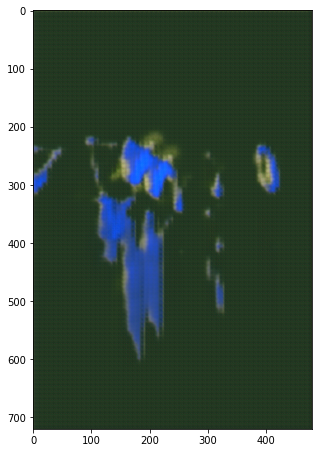

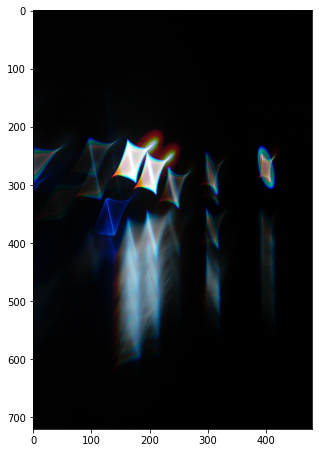

In [75]:
plt.figure(figsize=[5,10])
plt.imshow(original_image_estimation_test[11])

plt.figure(figsize=[5,10])
plt.imshow(test_img_data[11])